Importing the Modules

In [98]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

Importing the datasets

In [99]:
dt=pd.read_csv('/content/IRIS.csv')

Printing the first 5 datasets

In [100]:
dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Printing the last 5 datasets

In [101]:
dt.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Importing the column names of 'species' column

In [102]:
dt['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Converting the unqiue column names

In [103]:
dt=dt.replace(to_replace='Iris-setosa',value=0)
dt=dt.replace(to_replace='Iris-versicolor',value=1)
dt=dt.replace(to_replace='Iris-virginica',value=2)

/tmp/ipython-input-1483965965.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt=dt.replace(to_replace='Iris-virginica',value=2)


In [104]:
print(dt)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [105]:
dt['species'].unique()

array([0, 1, 2])

Splitting the datasets into 2 categories

In [106]:
x=np.array(dt[['sepal_length','sepal_width','petal_length','petal_width']])
y=np.array(dt['species'])

Dividing them into train and test cateogry

In [107]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Importing the model

In [108]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6, random_state=100)

Train the model

In [109]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       random_state=100)

Test the model

In [110]:
y_pred=clf.predict(x_test)

Predicting the accuracy

In [111]:
print("Accuracy:" ,accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [112]:
print("Class Report : ", classification_report(y_test,y_pred))

Class Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Plotting the tree

[Text(0.3333333333333333, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2222222222222222, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2777777777777778, 0.8, 'True  '),
 Text(0.4444444444444444, 0.7, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.38888888888888884, 0.8, '  False'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 5.3\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5555555555555556, 0.3, 'entropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.7777777777777778, 0.3, 'x[2] <= 5.05\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(

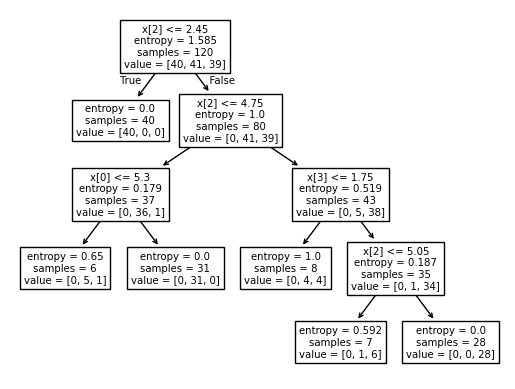

In [113]:
tree.plot_tree(clf)